In [13]:
### SKRIPT BY THOMAS BRIAN WINKLER
### PART OF THE ARTICLE "ENEGETICS AND DYNAMICS OF A STABLE BLOCH POINT" by Winkler et al. (2023)
from magnum import *
from math import *
import numpy as np
import random
import os.path
import os
import time
import sys
import re
import matplotlib.pyplot as plt
import matplotlib
from platform import python_version
print(python_version())
%matplotlib inline

3.9.2


In [16]:
def calc_shift( nt, system, sample):
    nar = 100
    naz1 = 30
    naz2 = 20
    a=0.4679*1e-09  # lattice constant of FeGe in m
    random.seed(0)
    t=(naz1+naz2)*a  #total thickness in [m]
    r=nar*a       #radius in [m]
    dia=2*r       #diameter in [m]  
    d = a*(naz1+naz2)/nt  #MM mesh size in [m] 
    nmmz = nt             # number of MM cells in z-direction
    nmm =int(round(dia/d)) # number of MM cells in x- and y-direction

    
    mu0 = 4*np.pi*1e-7   #mu0
    alpha = 0.28         #damping constant
    A =  8.78*1e-12         #Exchange constant in [J/m]
    Ms=0.384*1e6
    mu=Ms*a**3            #magnetic moment (for HB)
    J=2*A*a
    DISK = Material({
    'id': 'DISK',
    'Ms': Ms,
    'alpha': alpha,
    'A': A,
    'axis1': (0,0,1),
    'axis2': (0,1,0),
    'k_uniaxial': 0.0,
    'k_cubic': 0.0,
    'l':a,
    'mu':mu,
    'J':J})
    relax=0.5 #degree per nanosecond relax condition

    mesh = RectangularMesh((nmm, nmm, nmmz), (d, d, d))
    if sample == "rectangular":
        disk = Cuboid((0,0,0), (nmm*d,nmm*d,nmmz*d))
    if sample == "cylindrical":
        disk = Cylinder((nmm*d/2, nmm*d/2,0.0),(nmm*d/2, nmm*d/2,nmmz*d), nmm*d/2)
    world = World(mesh, Body("disk", DISK, disk))
    solver = create_solver(world, module_list =[StrayField, ExchangeField,ExternalField],
                           finescale = False,  log=False, do_precess = True) # finescale sets either MM (False) or HB mode (True).
   
    folder = system+"/MM_"+sample+"/"
    folderwrite = system+"/MM_"+sample+"/IP_dynamics_"+str(nt)+"/"

    if not os.path.isdir(folder): os.mkdir(folder)
    if not os.path.isdir(folderwrite): os.mkdir(folderwrite)
    filename_relaxed = system+"_relaxed_nt_"+str(nt)+".omf"
    solver.state.M = readOMF(folder+filename_relaxed)

    solver.state.M.normalize(Ms)
    solver.state.H_ext_offs = ((10*1e-3/mu0,0.0,0.0))
    solver.relax()
    solver.state.M.normalize(1)
    numpymag = solver.state.M.to_numpy()
    plt.figure(figsize=(3,3))
    plt.imshow(numpymag[:,:,0,2])
    plt.colorbar()
    plt.title("z-magnetization bottom")
    plt.show()
    plt.figure(figsize=(3,3))
    plt.imshow(numpymag[:,:,0,0])
    plt.colorbar()
    plt.title("x-magnetization bottom")
    plt.show()
    plt.figure(figsize=(3,3))
    plt.imshow(numpymag[:,:,-1,2])
    plt.colorbar()
    plt.title("z-magnetization top")
    plt.show()
    filename_applied = system+"_field_applied_nt_"+str(nt)+".omf"
    writeOMF(folder+filename_applied, solver.state.M)

def calc_relax( nt, system, sample):
    nar = 100
    naz1 = 30
    naz2 = 20
    a=0.4679*1e-09  # lattice constant of FeGe in m
    random.seed(0)
    t=(naz1+naz2)*a  #total thickness in [m]
    r=nar*a       #radius in [m]
    dia=2*r       #diameter in [m]  
    d = a*(naz1+naz2)/nt  #MM mesh size in [m] 
    nmmz = nt             # number of MM cells in z-direction
    nmm =int(round(dia/d)) # number of MM cells in x- and y-direction

    
    mu0 = 4*np.pi*1e-7   #mu0
    alpha = 0.28         #damping constant
    A =  8.78*1e-12         #Exchange constant in [J/m]
    Ms=0.384*1e6
    mu=Ms*a**3            #magnetic moment (for HB)
    J=2*A*a
    DISK = Material({
    'id': 'DISK',
    'Ms': Ms,
    'alpha': alpha,
    'A': A,
    'axis1': (0,0,1),
    'axis2': (0,1,0),
    'k_uniaxial': 0.0,
    'k_cubic': 0.0,
    'l':a,
    'mu':mu,
    'J':J})
    relax=0.5 #degree per nanosecond relax condition

    mesh = RectangularMesh((nmm, nmm, nmmz), (d, d, d))
    if sample == "rectangular":
        disk = Cuboid((0,0,0), (nmm*d,nmm*d,nmmz*d))
    if sample == "cylindrical":
        disk = Cylinder((nmm*d/2, nmm*d/2,0.0),(nmm*d/2, nmm*d/2,nmmz*d), nmm*d/2)
    world = World(mesh, Body("disk", DISK, disk))
    solver = create_solver(world, module_list =[StrayField, ExchangeField],
                           finescale = False,  log=False, do_precess = True) # finescale sets either MM (False) or HB mode (True).
   
    folder = system+"/MM_"+sample+"/"
    folderwrite = system+"/MM_"+sample+"/IP_dynamics_"+str(nt)+"/"

    if not os.path.isdir(folder): os.mkdir(folder)
    if not os.path.isdir(folderwrite): os.mkdir(folderwrite)

    filename_applied = system+"_field_applied_nt_"+str(nt)+".omf"
    solver.state.M = readOMF(folder+filename_applied)
    solver.state.M.normalize(1)
    numpymag = solver.state.M.to_numpy()
    plt.figure(figsize=(3,3))
    plt.imshow(numpymag[:,:,0,2])
    plt.colorbar()
    plt.title("z-magnetization bottom")
    plt.show()
    plt.figure(figsize=(3,3))
    plt.imshow(numpymag[:,:,0,0])
    plt.colorbar()
    plt.title("x-magnetization bottom")
    plt.show()
    plt.figure(figsize=(3,3))
    plt.imshow(numpymag[:,:,-1,2])
    plt.colorbar()
    plt.title("z-magnetization top")
    plt.show()

    solver.state.M.normalize(Ms)
    solver.addStepHandler(OOMMFStorage(folderwrite, "M"), condition.EveryNthSecond(2e-11))
    solver.relax()
    solver.state.M.normalize(1)
    numpymag = solver.state.M.to_numpy()
    plt.figure(figsize=(3,3))
    plt.imshow(numpymag[:,:,0,2])
    plt.colorbar()
    plt.title("z-magnetization bottom")
    plt.show()
    plt.figure(figsize=(3,3))
    plt.imshow(numpymag[:,:,0,0])
    plt.colorbar()
    plt.title("x-magnetization bottom")
    plt.show()
    plt.figure(figsize=(3,3))
    plt.imshow(numpymag[:,:,-1,2])
    plt.colorbar()
    plt.title("z-magnetization top")
    plt.show()
    

[   INFO] - LandauLifshitzGilbert module configuration:
[   INFO] -  - H_tot = H_stray + H_exch + H_ext
[   INFO] -  - E_tot = E_stray + E_exch + E_ext
[   INFO] -  - dM/dt = LLGE(M, H_tot)
[   INFO] - Performance hint: The number of cells nx, ny, nz in each direction should satisfy nx >= ny >= nz.
[   INFO] - Setting up demagnetization tensor field
[   INFO] -   Magn. size      : 80x80x20 cells
[   INFO] -   FFT size        : 160x160x40
[   INFO] -   PBC dimensions  : none  (1 repetitions)
[   INFO] -   Cache file      : /uni-mainz.de/homes/twinkler/.cache/magnum/Demag--80-80-20--160-160-40--1169-1169-1169.dat
[   INFO] -   0%
[   INFO] -   50%
[   INFO] -   100%
[   INFO] - ExternalField: Providing model variable H_ext, parameters are H_ext_offs, H_ext_amp, H_ext_freq, H_ext_phase, H_ext_fn
[   INFO] - Initialized modules: LandauLifshitzGilbert, StrayField, ExchangeField, ExternalField
[   INFO] - Initializing material parameters
[   INFO] -   body id='disk', volume=78.5%, params: 'M

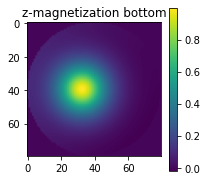

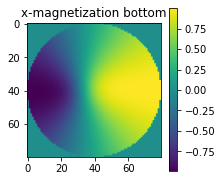

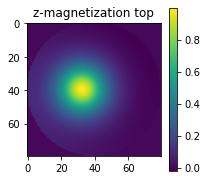

[   INFO] - LandauLifshitzGilbert module configuration:
[   INFO] -  - H_tot = H_stray + H_exch
[   INFO] -  - E_tot = E_stray + E_exch
[   INFO] -  - dM/dt = LLGE(M, H_tot)
[   INFO] - Performance hint: The number of cells nx, ny, nz in each direction should satisfy nx >= ny >= nz.
[   INFO] - Setting up demagnetization tensor field
[   INFO] -   Magn. size      : 80x80x20 cells
[   INFO] -   FFT size        : 160x160x40
[   INFO] -   PBC dimensions  : none  (1 repetitions)
[   INFO] -   Cache file      : /uni-mainz.de/homes/twinkler/.cache/magnum/Demag--80-80-20--160-160-40--1169-1169-1169.dat
[   INFO] -   0%
[   INFO] -   50%
[   INFO] -   100%
[   INFO] - Initialized modules: LandauLifshitzGilbert, StrayField, ExchangeField
[   INFO] - Initializing material parameters
[   INFO] -   body id='disk', volume=78.5%, params: 'Ms=384000', 'alpha=0.28', 'A=8.78e-12'
[   INFO] - Runge Kutta evolver: method is rkf45, step size controller is MMM(eps_abs=0.001, eps_rel=0.0001).
[   INFO] - As

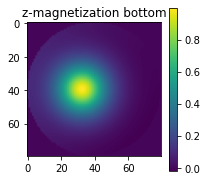

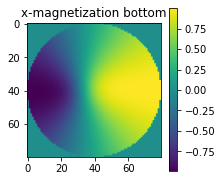

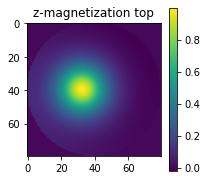

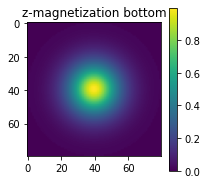

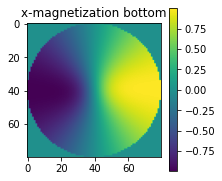

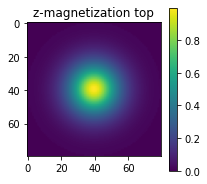

[   INFO] - LandauLifshitzGilbert module configuration:
[   INFO] -  - H_tot = H_stray + H_exch + H_ext
[   INFO] -  - E_tot = E_stray + E_exch + E_ext
[   INFO] -  - dM/dt = LLGE(M, H_tot)
[   INFO] - Performance hint: The number of cells nx, ny, nz in each direction should satisfy nx >= ny >= nz.
[   INFO] - Setting up demagnetization tensor field
[   INFO] -   Magn. size      : 120x120x30 cells
[   INFO] -   FFT size        : 240x240x60
[   INFO] -   PBC dimensions  : none  (1 repetitions)
[   INFO] -   Cache file      : /uni-mainz.de/homes/twinkler/.cache/magnum/Demag--120-120-30--240-240-60--779-779-779.dat
[   INFO] -   0%
[   INFO] -   50%
[   INFO] -   100%
[   INFO] - ExternalField: Providing model variable H_ext, parameters are H_ext_offs, H_ext_amp, H_ext_freq, H_ext_phase, H_ext_fn
[   INFO] - Initialized modules: LandauLifshitzGilbert, StrayField, ExchangeField, ExternalField
[   INFO] - Initializing material parameters
[   INFO] -   body id='disk', volume=78.5%, params: '

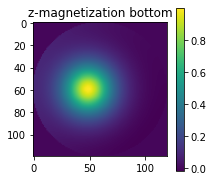

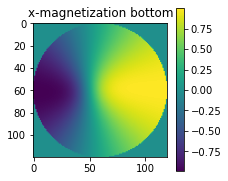

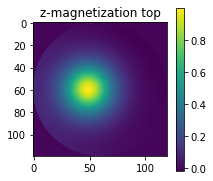

[   INFO] - LandauLifshitzGilbert module configuration:
[   INFO] -  - H_tot = H_stray + H_exch
[   INFO] -  - E_tot = E_stray + E_exch
[   INFO] -  - dM/dt = LLGE(M, H_tot)
[   INFO] - Performance hint: The number of cells nx, ny, nz in each direction should satisfy nx >= ny >= nz.
[   INFO] - Setting up demagnetization tensor field
[   INFO] -   Magn. size      : 120x120x30 cells
[   INFO] -   FFT size        : 240x240x60
[   INFO] -   PBC dimensions  : none  (1 repetitions)
[   INFO] -   Cache file      : /uni-mainz.de/homes/twinkler/.cache/magnum/Demag--120-120-30--240-240-60--779-779-779.dat
[   INFO] -   0%
[   INFO] -   50%
[   INFO] -   100%
[   INFO] - Initialized modules: LandauLifshitzGilbert, StrayField, ExchangeField
[   INFO] - Initializing material parameters
[   INFO] -   body id='disk', volume=78.5%, params: 'Ms=384000', 'alpha=0.28', 'A=8.78e-12'
[   INFO] - Runge Kutta evolver: method is rkf45, step size controller is MMM(eps_abs=0.001, eps_rel=0.0001).
[   INFO] - A

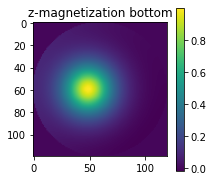

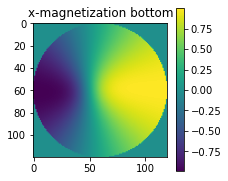

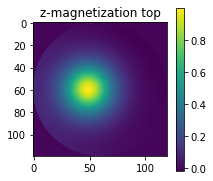

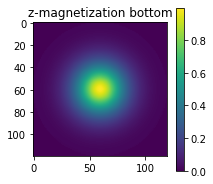

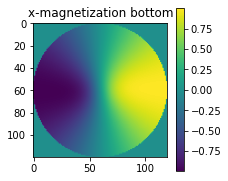

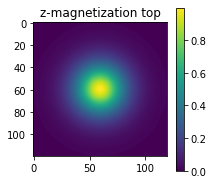

In [19]:
system= "CV" #chossing configurations Bloch point (BP)

if os.path.isfile(system):
    os.mkdir(system)


for nt in[20, 30]: # thickness in units of FeGe lattice constant, in study [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90]. 50 equals the atomistic lattice constant.
    for sample in ["cylindrical"]:
        calc_shift(nt, system, sample)
        calc_relax(nt, system, sample)